# Kaggle Survey Analysis

**23/03/2021**

**By Pedro Rocha**

---

## Introduction
Kagle is an online community of data scientists and machine learning practitioners. Kaggle allows users to find and publish data sets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges. 

If you haven't join Kaggle yet, you can start your journey [HERE](https://www.kaggle.com/)

For the first time, Kaggle conducted an industry-wide survey to establish a comprehensive view of the state of data science and machine learning. The survey received over 16,000 responses.

[Click here to check the data set](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## I - Problem Understanding 

With this project I want to analyze the Kaggle Survey in order to answer the following questions:
* What skills people are more important to people?
* Which jobs give more satisfaction?
* Another insights in job satisfaction
* How much time people spend studying Data Science?
* Which languages people recommend to learn?
* What platforms people use to learn?

## II - Data understanding and preparation

In [512]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

Read the data and store it in a data frame:

In [672]:
#Read survey file
path = r"C:\Users\NOTEBOOK\Desktop\Udacity DSND\Project 1\Kaggle DS\multipleChoiceResponses.csv"
df = pd.read_csv(path, encoding='latin-1',low_memory=False)
#Read schema of survey
path = r"C:\Users\NOTEBOOK\Desktop\Udacity DSND\Project 1\Kaggle DS\schema.csv"
schema = pd.read_csv(path)

In [673]:
#Take a look to the dataframe
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's take a look to the columns to see what features we've in this dataset

In [674]:
#Get the columns names in a list
df.columns.tolist()

['GenderSelect',
 'Country',
 'Age',
 'EmploymentStatus',
 'StudentStatus',
 'LearningDataScience',
 'CodeWriter',
 'CareerSwitcher',
 'CurrentJobTitleSelect',
 'TitleFit',
 'CurrentEmployerType',
 'MLToolNextYearSelect',
 'MLMethodNextYearSelect',
 'LanguageRecommendationSelect',
 'PublicDatasetsSelect',
 'LearningPlatformSelect',
 'LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'Lear

## Descriptive statistics

In [675]:
#Use .describe() to get a summary of statistics 
df.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect
count,16385.000000,13109.000000,13126.000000,13111.000000,13122.000000,13126.000000,13094.000000,7530.000000,7528.000000,7517.000000,7529.000000,7523.000000,7513.000000
mean,32.372841,33.366771,27.375514,15.217593,16.988607,5.531434,1.795940,36.144754,21.268066,10.806372,13.869372,13.094776,2.396247
std,10.473487,25.787181,26.860840,18.996778,23.676917,11.072680,9.357886,21.649591,16.165958,12.257932,11.722945,12.974846,12.157137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,10.000000,0.000000,5.000000,5.000000,0.000000
50%,30.000000,30.000000,20.000000,10.000000,5.000000,0.000000,0.000000,35.000000,20.000000,10.000000,10.000000,10.000000,0.000000
75%,37.000000,50.000000,40.000000,25.000000,30.000000,10.000000,0.000000,50.000000,30.000000,15.000000,20.000000,20.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000


In [676]:
#Use .describe() for summary of statistics 
#Include object to summary the categorical variables 
df.describe(include=object)

,GenderSelect,Country,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
count,16621,16595,16716,1280,1284,13186,3012,11830,11504,11601,...,3437,3416,3414,3411,3394,3424,3409,3401,3410,3424
unique,4,52,7,2,3,2,2,16,3,91,...,3,3,3,3,3,3,3,3,3,3
top,Male,United States,Employed full-time,Yes,"Yes, I'm focused on learning mostly data scien...",Yes,Yes,Data Scientist,Fine,Employed by professional services/consulting firm,...,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important,Somewhat important
freq,13610,4197,10897,981,800,10153,2126,2433,7501,2383,...,1701,1649,1518,1918,1666,1509,1724,1769,1662,1503


## Data cleaning

In [677]:
df.isnull().mean().sort_values()

EmploymentStatus                     0.000000
GenderSelect                         0.005683
Country                              0.007239
Age                                  0.019801
FormalEducation                      0.101759
                                       ...   
WorkToolsFrequencyStatistica         0.997487
WorkMethodsFrequencySelect2          0.997667
WorkToolsFrequencyKNIMECommercial    0.997846
WorkToolsFrequencySalfrod            0.998086
WorkToolsFrequencyAngoss             0.998684
Length: 228, dtype: float64

In [678]:
#I'm going to drop columns with more than 90% of NaNs:
for col in list(df.columns):
    if df[col].isnull().mean()> 0.90:
        df = df.drop(columns=col,axis=1)

df.shape

(16716, 139)

After drop these columns, the dataframe contain 16716 rows and 139 columns

First I'll work with the Job Satisfaction data, so I'll create a DataFrame and clean the NaN values in that column:

In [680]:
#First copy the dataframe
df_job = pd.DataFrame.copy(df,deep=True)
#Drop rows with NaN values in the Job Satisfaction column
df_job = df_job.dropna(subset=['JobSatisfaction'])
#See the shape of the DF
df_job.shape

(6677, 139)

After drop these rows, the dataframe contain 6677 rows and 139 columns

### Where are the respondents from?

In [681]:
df.Country.value_counts()/df.shape[0]

United States                  0.251077
India                          0.161761
Other                          0.061199
Russia                         0.034578
United Kingdom                 0.032005
People 's Republic of China    0.028177
Brazil                         0.027818
Germany                        0.027519
France                         0.026442
Canada                         0.026322
Australia                      0.025185
Spain                          0.019143
Japan                          0.016571
Taiwan                         0.015195
Italy                          0.014238
Netherlands                    0.012264
Ukraine                        0.011725
South Korea                    0.011606
Singapore                      0.011007
Poland                         0.011007
Pakistan                       0.009631
Turkey                         0.008615
Indonesia                      0.007837
Switzerland                    0.007717
South Africa                   0.007598


We can see, almost 30% of the respondents are from EEUU and 11% are from India.
Less than 1% of the respondents are from Argentina, my country.

### Which countries have the best job satisfaction score?

Firts I'll prepare the data:

In [682]:
#Fix the values:
df_job['JobSatisfaction'] = df_job['JobSatisfaction'].str.replace(" - Highly Satisfied",'').str.replace(' - Highly Dissatisfied','')
#Drop responses that do not interest us:
df_job.drop(df_job.loc[df_job['JobSatisfaction'] == 'I prefer not to share'].index, inplace=True)
df_job.drop(df_job.loc[df['JobSatisfaction'] == 'nan'].index, inplace=True)
#Convert values to float:
df_job['JobSatisfaction'] = df_job['JobSatisfaction'].astype(float)

Group the data by country:

In [683]:
#Group by country and calculate the mean of each one:
country_satisf = pd.DataFrame(df_job.groupby(['Country']).mean()['JobSatisfaction'].sort_values(ascending=False)).reset_index()
country_satisf

,Country,JobSatisfaction
0,Sweden,7.974359
1,Israel,7.886792
2,Mexico,7.477612
3,Colombia,7.363636
4,Switzerland,7.323944
5,Chile,7.307692
6,Czech Republic,7.264706
7,Romania,7.200000
8,Indonesia,7.187500
9,Greece,7.161290


We can see that Israel and Sweden have almost 8 points. Seems like great places to work!

**Plot top 15 countries:**

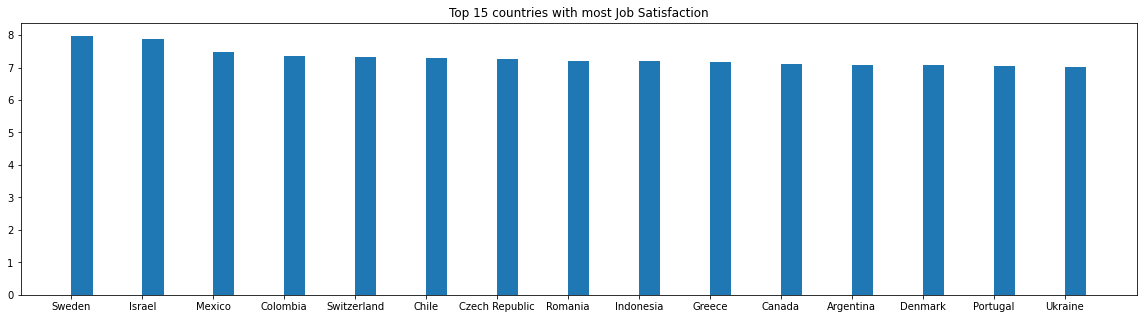

In [684]:
top15cs = country_satisf.head(15)
plt.figure(figsize=(20,5))
plt.bar(top15cs['Country'],top15cs['JobSatisfaction'],align='edge', width=0.3)
plt.title('Top 15 countries with most Job Satisfaction');

### There are lot of jobs in the Data Science field. Let's see which ones have the higher job satisfaction score:

In [685]:
#Group by job title and calculate the mean for each one:
title_df = pd.DataFrame(df_job.groupby(['CurrentJobTitleSelect']).mean()['JobSatisfaction'].sort_values(ascending=False)).reset_index()
title_df

,CurrentJobTitleSelect,JobSatisfaction
0,Data Scientist,7.221915
1,Machine Learning Engineer,7.202020
2,Operations Research Practitioner,7.064516
3,Scientist/Researcher,6.958466
4,Predictive Modeler,6.937500
5,Researcher,6.857143
6,Statistician,6.823204
7,Computer Scientist,6.760000
8,Other,6.721805
9,Data Miner,6.682540


#### ML engineers and Data scientists are the jobs with the best satisfaction score.

We can see the Top 10 in a plot:

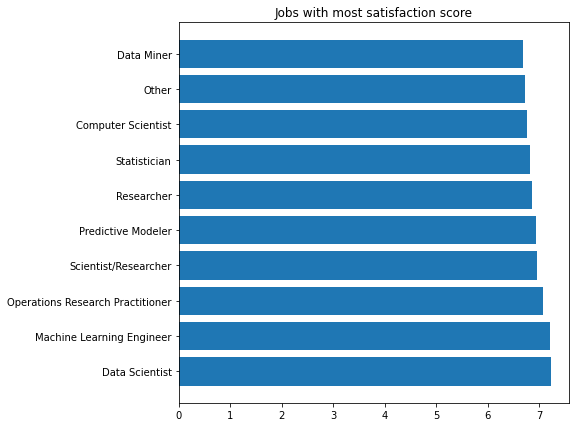

In [686]:
top10ts = title_df.head(10)
plt.figure(figsize=(7,7))
plt.barh(top10ts['CurrentJobTitleSelect'],top10ts['JobSatisfaction'],align='center')
plt.title('Jobs with most satisfaction score');

Sometimes a job doesn't fit with the title it has. Does it affect our satisfaction? Let's see:

In [687]:
#Group by title fit category and get the mean of Job satisfaction score for each one:
fit_df = pd.DataFrame(df_job.groupby(['TitleFit']).mean()['JobSatisfaction'].sort_values(ascending=False))
fit_df

,JobSatisfaction
TitleFit,
Perfectly,7.380524
Fine,6.756989
Poorly,5.906426


**It seems that how much our work fits with the title has a lot to do with the satisfaction that the job position can give us.**

Plot this:

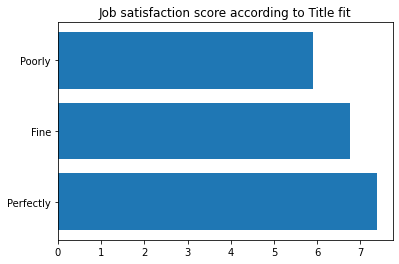

In [688]:
fit_df.reset_index(inplace=True)
plt.barh(fit_df['TitleFit'],fit_df['JobSatisfaction'],align='center')
plt.title('Job satisfaction score according to Title fit');

### Remote work is becoming more and more common. Does this affect job satisfaction?

In [689]:
#Group by Remote Work category and calculate the mean of Job satisfaction score for each one
remote_df = pd.DataFrame(df_job.groupby(['RemoteWork']).mean()['JobSatisfaction'].sort_values(ascending=False))
remote_df

,JobSatisfaction
RemoteWork,
Always,7.477876
Most of the time,7.060092
Sometimes,6.873029
Rarely,6.768056
Don't know,6.695652
Never,6.027954


**The relationship is clear, the more remote work the greater the satisfaction**

Plot this results:

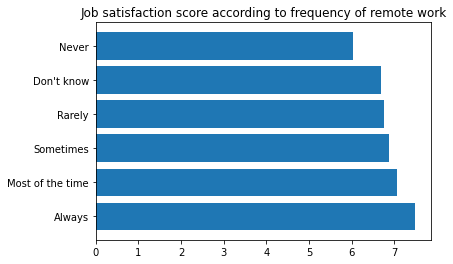

In [690]:
remote_df.reset_index(inplace=True)
plt.barh(remote_df['RemoteWork'],remote_df['JobSatisfaction'],align='center')
plt.title('Job satisfaction score according to frequency of remote work');

### I want to analyze some recommendations that people've done in this survey. For that I'll define a function that counts the differents options a user've checked in case that the question gives multiple choices.

In [691]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

### Where do kaggle users learn Data Science from?

From now on I will use again the DataFrame named **df**, because for this analysis I don't need to drop the rows with NaNs in JobSatisfaction column

In [692]:
#Create a list with the options for the question. 
lear_options = ['Arxiv,Blogs','College/University,Company internal community','Conferences','Kaggle','Newsletters','Non-Kaggle online communities','Official documentation','Online courses','Personal Projects','Podcasts','Stack Overflow Q&A','Textbook','Trade book','Tutoring/mentoring','YouTube Videos','Other']
#Create a DataFrame and count the responses
lear_plat = df['LearningPlatformSelect'].value_counts().reset_index()
#Rename columns
lear_plat.rename(columns={'index':'platforms','LearningPlatformSelect':'count'},inplace=True)
#Pass the DataFrame and the list of options through the total_count function
lear_plat_df = total_count(lear_plat, 'platforms', 'count', lear_options)
#Check the results!
lear_plat_df

,platforms,count
3,Kaggle,6902
7,Online courses,6042
10,Stack Overflow Q&A,5703
14,YouTube Videos,5291
8,Personal Projects,4873
11,Textbook,4246
6,Official documentation,2354
2,Conferences,2217
0,"Arxiv,Blogs",1535
13,Tutoring/mentoring,1458


### Kaggle and online courses are the most used options to learn! Let's find out what platforms are using to take online courses!

In [693]:
#Create a list with the options for the question. 
options = ['Coursera','edX','DataCamp','Udacity','Other']
#Create a DataFrame and count the responses
platforms = df['CoursePlatformSelect'].value_counts().reset_index()
#Rename columns
platforms.rename(columns={'index':'Platforms','CoursePlatformSelect':'count'},inplace=True)
#Pass the DataFrame and the list of options through the total_count function
platf_df = pd.DataFrame()
platf_df = total_count(platforms,'Platforms', 'count', options)
#Calculate the percentage of votes that each platform received
platf_df['%'] = platf_df['count']/platf_df['count'].sum()
#Let's see the results!
platf_df

,Platforms,count,%
0,Coursera,1725,0.407416
3,Udacity,805,0.190128
1,edX,710,0.167690
2,DataCamp,638,0.150685
4,Other,356,0.084081


Coursera and Udacity are the winners here! Let's plot the results:

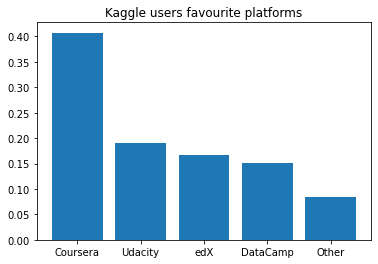

In [694]:
plt.bar(platf_df['Platforms'],platf_df['%'],align='center')
plt.title('Kaggle users favourite platforms');

### What programming languages do Kaggle Users recommend?

In [713]:
#Create a DataFrame that shows the percentage of people that recommend each language
language_df = pd.DataFrame(df.LanguageRecommendationSelect.value_counts()/df.LanguageRecommendationSelect.value_counts().sum())
#Reset index
language_df.reset_index(inplace=True)
#Rename columns
language_df.rename(columns={'index':'Language','LanguageRecommendationSelect':'Recommendation'},inplace=True)
#See the results
language_df

,Language,Recommendation
0,Python,0.631115
1,R,0.240316
2,SQL,0.035006
3,C/C++/C#,0.027914
4,Matlab,0.021640
5,Java,0.012548
6,Scala,0.008547
7,SAS,0.008001
8,Other,0.007729
9,Julia,0.002728


The big winner is Python, followed by R and SQL. If you want to be a DS now you know where to start! 

We can se it better in a plot:

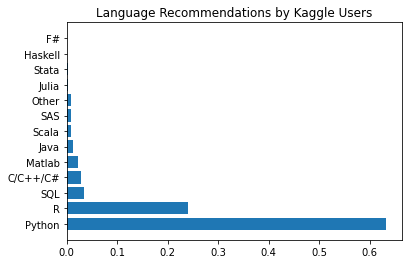

In [708]:
plt.barh(language_df['Language'],language_df['Recommendation'],align='center')
plt.title('Language Recommendations by Kaggle Users');

### How much hours per week users spend studying data science?

In [716]:
#Drop the NaN values
df_time = df['TimeSpentStudying'].dropna()
pd.DataFrame(df_time.value_counts()/df_time.value_counts().sum())

,TimeSpentStudying
2 - 10 hours,0.576713
11 - 39 hours,0.196872
0 - 1 hour,0.183466
40+,0.042949


Most of the users spend 2-10 Hrs a week studying Data Science.

### Which skills are more important by Kaggle Users?

In [717]:
#List of the skills that the survey analyze
skills = ['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']
#Create an empty DF
df_skills = pd.DataFrame()

'''Create a loop that calculate the percentage of users that consider each skill as 
Necessary - Nice to hace - Unnecessary and appends it to the new DF'''
for skill in skills:
    col = df[skill].value_counts()/df[skill].value_counts().sum()
    df_skills[skill] = col
#Transpose the DF
df_skills = df_skills.transpose()
#Sort the values to see the ones that users consider more neccesary
df_skills.sort_values('Necessary', ascending=False)

,Nice to have,Necessary,Unnecessary
JobSkillImportancePython,0.327214,0.645994,0.026792
JobSkillImportanceStats,0.457576,0.513889,0.028535
JobSkillImportanceVisualizations,0.490820,0.455392,0.053788
JobSkillImportanceSQL,0.491778,0.434224,0.073998
JobSkillImportanceR,0.513945,0.414807,0.071247
JobSkillImportanceBigData,0.574065,0.379929,0.046006
JobSkillImportanceDegree,0.598107,0.279867,0.122026
JobSkillImportanceEnterpriseTools,0.564970,0.144829,0.290200
JobSkillImportanceKaggleRanking,0.677261,0.118863,0.203876
JobSkillImportanceMOOC,0.606994,0.107255,0.285752


#### Python, statistics and visualizations are the Top 3 skills consider more necessary by Kaggle Users!

Let's plot this data to analyze it better:

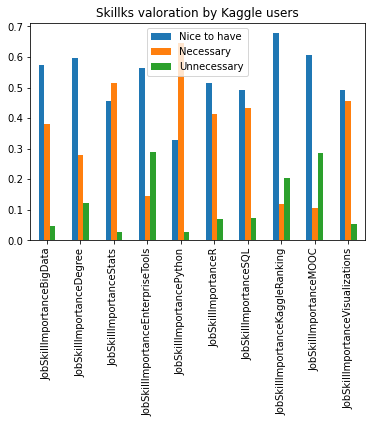

In [712]:
df_skills.plot(kind='bar',title='Skillks valoration by Kaggle users');

### Conclutions

* ML engineers and Data scientists are the jobs with the best satisfaction score.
* It seems that how much our work fits with the title has a lot to do with the satisfaction that the job position can give us.
* The more remote work the greater the satisfaction
* Kaggle and online courses are the most used options to learn by Kaggle users.
* Coursera and Udacity are the most used platforms to enroll online courses
* Python, followed by R and SQL are the recommended programming languages by Kaggle users
* Python, statistics and visualizations are the Top 3 skills consider more necessary by Kaggle Users

Thanks for read my project! You can see more of my work in my [GitHub](https://github.com/rocha-p)